<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
<h3>
<center><b>CAPSTONE</b></center>
<center><b>Predict H1N1 and Seasonal Flu Vaccines</b></center>
<center><b>GRUPO 3</b></center>
</h3>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opinioes y comportamientos a nivel salud.

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.
*   `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
*   `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

# 1. Exploración del dataset

En esta fase vamos a cargar y preparar el dataset para realizar la fase EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Cargamos el dataset y exploramos su estructura y datos.

In [137]:
df = pd.read_csv('training_set_features_original.csv')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


El dataset tiene 26707 filas y 36 columnas.

In [138]:
df.shape

(26707, 36)

Tipos de datos por columna:

In [139]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# 2. Depuración de datos

En esta etapa vamos a evaluar la existencia de valores nulos y valores duplicados.

## Valores duplicados

No se encontraron datos duplicados.

In [141]:
df.duplicated(keep='first').sum()

0

## Valores nulos

In [142]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

Vamos a remover las columnas con un alto volumen de valores nulos.
*   `hhs_geo_region` no tiene nulos, pero tiene textos irrelevantes.
*   `employment_industry` (13330), los textos son irrelevantes.
*   `employment_occupation` (13470), los textos son irrelevantes.

También vamos a remover la columna respondent_id dado que no agrega datos valiosos, y es equivalente al index del dataset.


In [143]:
# Remove columns respondent_id, hhs_geo_region, employment_industry, employment_occupation with a high volume of null values and texts no relevant.
df.drop(['respondent_id'], axis=1, inplace=True)
df.drop(['hhs_geo_region'], axis=1, inplace=True)
df.drop(['employment_industry'], axis=1, inplace=True)
df.drop(['employment_occupation'], axis=1, inplace=True)

Text(0.5, 1.0, 'Missing values heatmap')

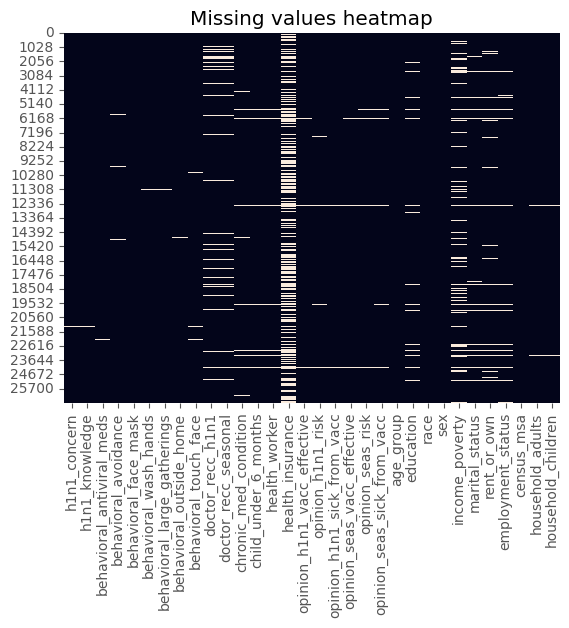

In [144]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [145]:
df.shape

(26707, 32)

In [146]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

Tenemos varias variables categóricas binarias tipo 1/0. Solo en algunos pocos casos podríamos asumir que una "no respuesta" se puede poblar con la respueta negativa 0:
*   `doctor_recc_h1n1` es una  variable con **2160 valores nulos**
*   `doctor_recc_seasonal` es una  variable con **2160 valores nulos**
*   `health_worker` es un variable con **804 valores nulos**
*   `health_insurance` es un variable con **12274 valores nulos**




In [147]:
print("null ", df['doctor_recc_h1n1'].isnull().sum())
print(df['doctor_recc_h1n1'].value_counts())

null  2160
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64


In [148]:
print("null ", df['doctor_recc_seasonal'].isnull().sum())
print(df['doctor_recc_seasonal'].value_counts())

null  2160
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64


In [149]:
print("null ", df['health_worker'].isnull().sum())
print(df['health_worker'].value_counts())

null  804
0.0    23004
1.0     2899
Name: health_worker, dtype: int64


In [150]:
print("null ", df['health_insurance'].isnull().sum())
print(df['health_insurance'].value_counts())

null  12274
1.0    12697
0.0     1736
Name: health_insurance, dtype: int64


Poblamos los nulos de las variables categóricas binarias cuya no respuesta, se puede poblar con respuesta negativa 0:

In [151]:
df.loc[df["doctor_recc_h1n1"].isnull(), 'doctor_recc_h1n1'] = 0
df.loc[df["doctor_recc_seasonal"].isnull(), 'doctor_recc_seasonal'] = 0
df.loc[df["health_worker"].isnull(), 'health_worker'] = 0
df.loc[df["health_insurance"].isnull(), 'health_insurance'] = 0

In [152]:
df.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months            820
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

Text(0.5, 1.0, 'Missing values heatmap')

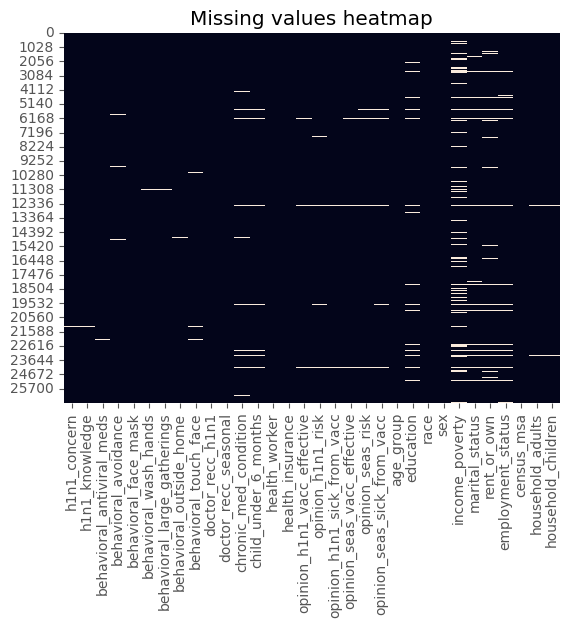

In [153]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

Exportamos el dataset resultado a un csv nuevo:

In [156]:
df.to_csv('training_set_features_eda.csv')

# Distribución de los datos

En esta fase vamos a realizar diferentes visualizaciones del dataset, que nos van a permitir tener un conocimiento más profundo de los datos.

In [157]:
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,26707.000000,...,26707.000000,26707.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.202494,...,0.108548,0.475418,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.401866,...,0.311077,0.499405,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [158]:
df["sex"].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

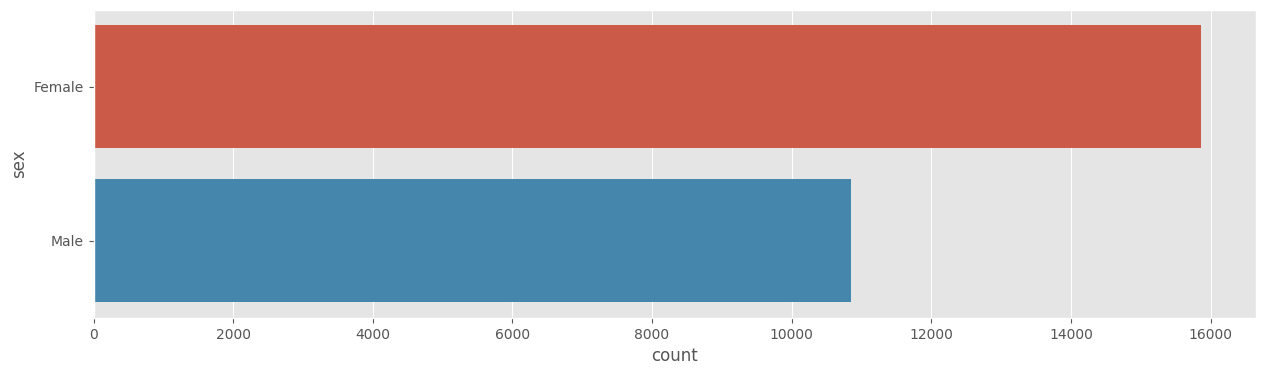

In [159]:
plt.style.use('ggplot')
plt.figure(1 , figsize = (15 , 4))
sns.countplot(y = 'sex' , data = df)
plt.show()

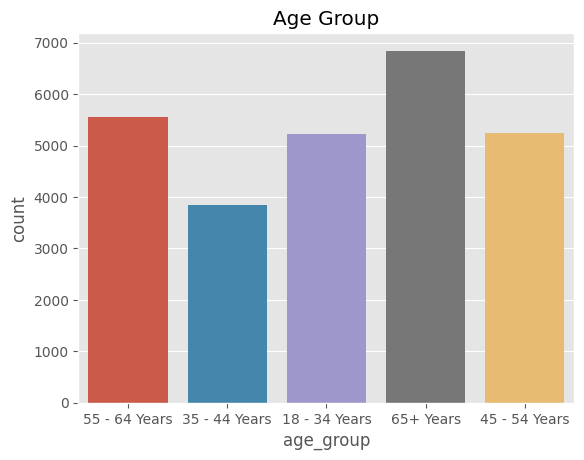

In [160]:
sns.countplot(x = df['age_group'])
plt.title("Age Group")
plt.show()

<Axes: title={'center': 'Age Group'}, ylabel='age_group'>

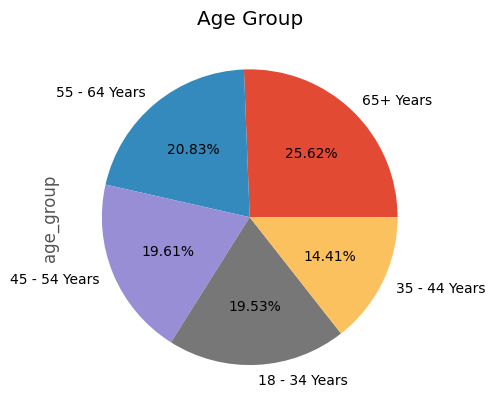

In [161]:
df['age_group'].value_counts().plot.pie(autopct = '%1.2f%%', title='Age Group')

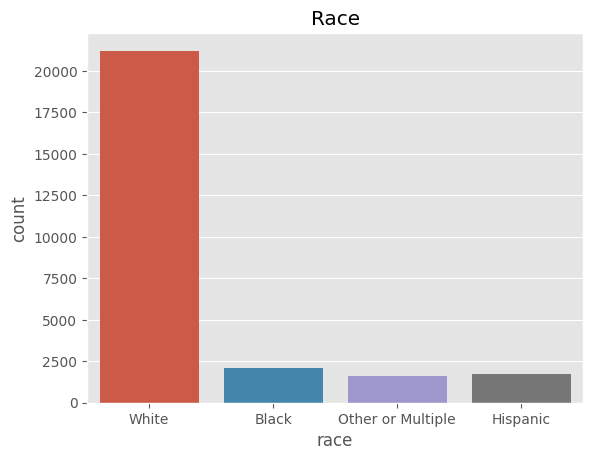

In [162]:
sns.countplot(x = df['race'])
plt.title("Race")
plt.show()

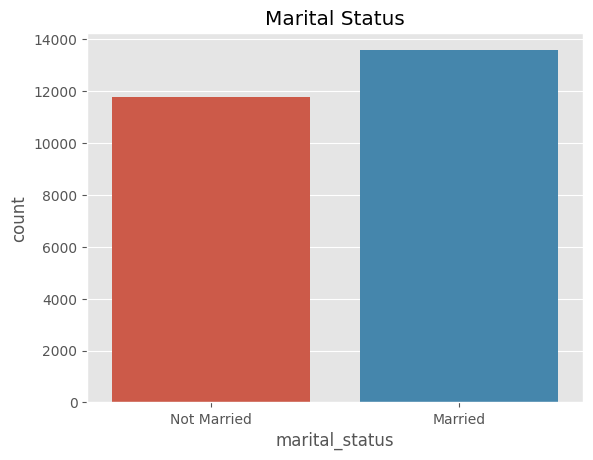

In [163]:
sns.countplot(x = df['marital_status'])
plt.title("Marital Status")
plt.show()

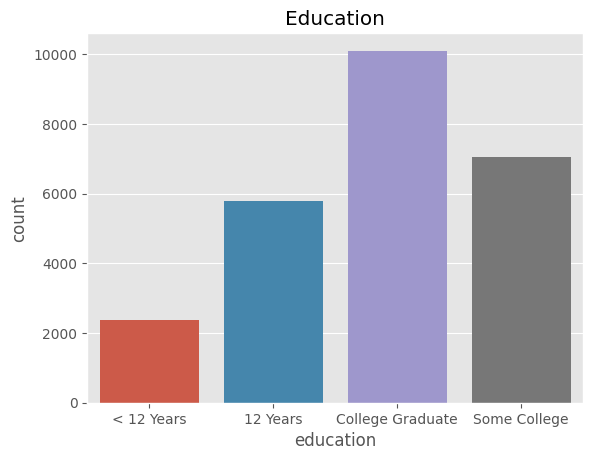

In [164]:
sns.countplot(x = df['education'])
plt.title("Education")
plt.show()

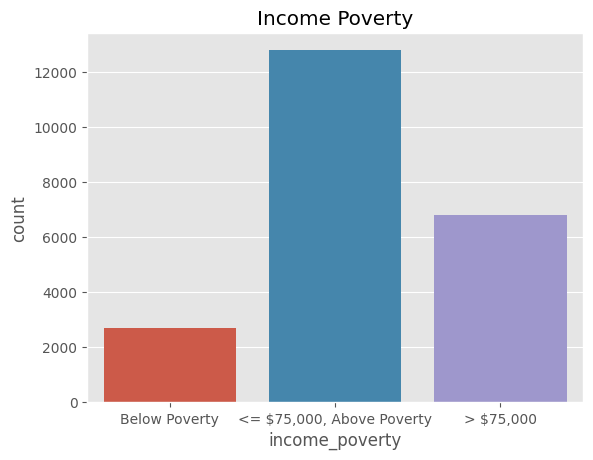

In [165]:
sns.countplot(x = df['income_poverty'])
plt.title("Income Poverty")
plt.show()

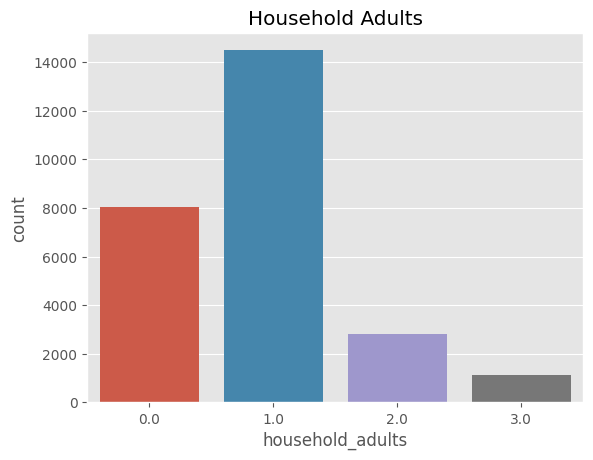

In [166]:
sns.countplot(x = df['household_adults'])
plt.title("Household Adults")
plt.show()

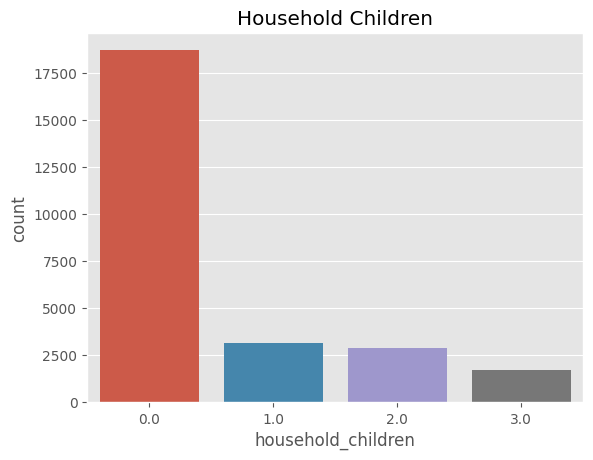

In [167]:
sns.countplot(x = df['household_children'])
plt.title("Household Children")
plt.show()

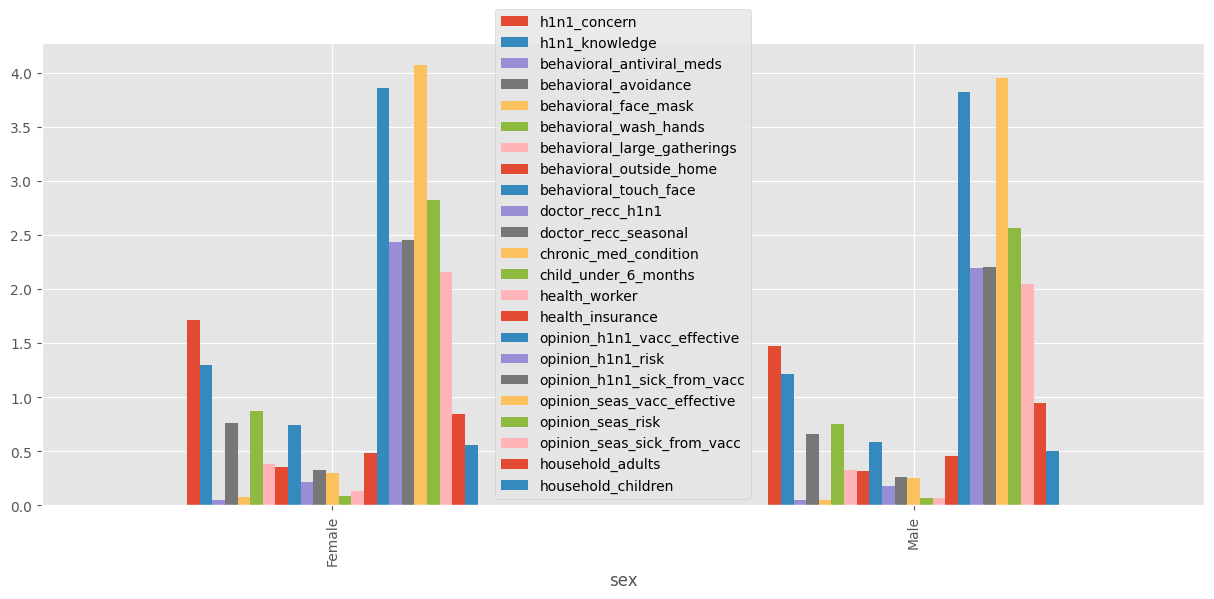

In [168]:
df.groupby('sex').mean().plot(kind='bar',figsize=(15,6));

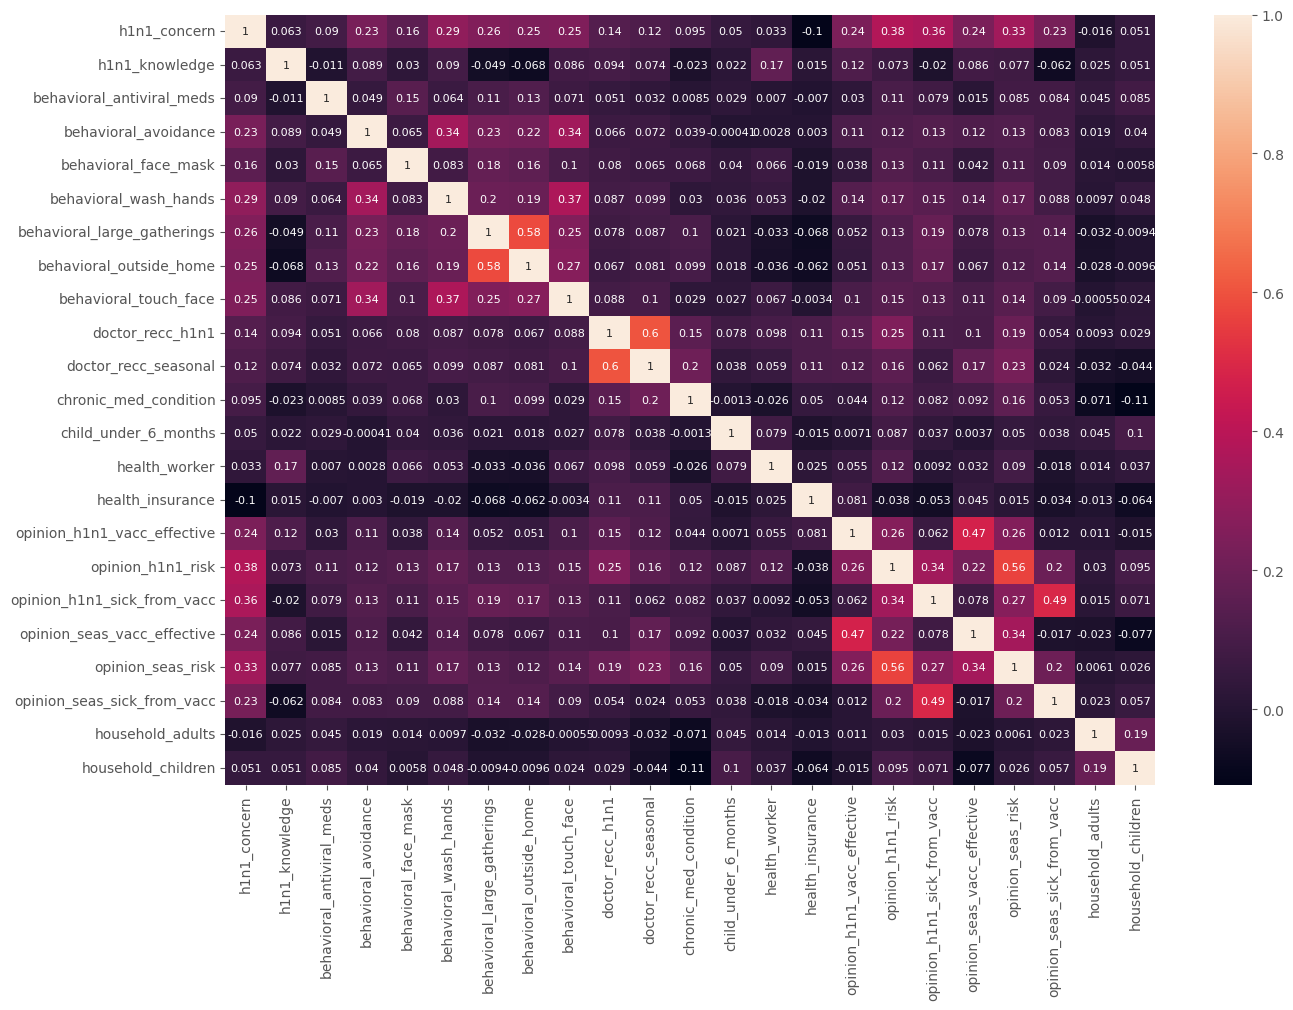

In [169]:
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize":8})
plt.show()

# Análisis de Variables

Análisis univariable y bivariante o multivariante de variables relevantes.